# Phishing Websites Detector

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:

data = pd.read_csv('dataset_small.csv')
data.drop_duplicates(inplace=True) # Drop Duplicate Data

data.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,...,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,...,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,...,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,...,1,2,1,389,1,1,0,0,0,1


In [3]:
data.tls_ssl_certificate.unique()

array([0, 1], dtype=int64)

In [4]:
data["asn_ip"].unique()

array([  8560, 263283,  26496, ..., 135262,  35818,  29024], dtype=int64)

# Data Visualization

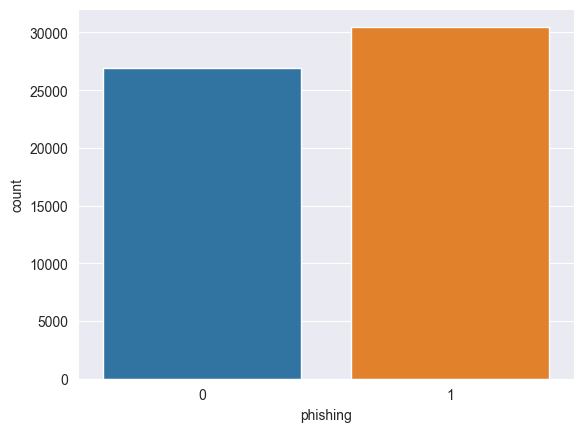

In [5]:
sns.countplot(data=data, x='phishing')
plt.show()

In [6]:
print("1 :", data.phishing.sum())
print("0 :", data.shape[0]-data.phishing.sum())

1 : 30497
0 : 26908


In [7]:
x = data.drop(columns=['phishing'])
y=data.phishing

# Feature Selection
1. Dropping Constant Features
2. Removing Highly Correlated Features


# 1. Dropping Constant Features :-

In [8]:
from sklearn.feature_selection import VarianceThreshold

var = VarianceThreshold(threshold=0)
var.fit(x)

print("Total Columns :",len(var.get_support()))
print("Columns Dropped :",len(var.get_support()) - sum(var.get_support()))

X_new = x[x.columns[var.get_support()]]

print("Columns Left :",len(X_new.columns))

Total Columns : 111
Columns Dropped : 13
Columns Left : 98


# 2. Drop Highly Correlated Features

In [9]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_corr.add(corr_matrix.columns[i])
    return col_corr

In [10]:
corr_features = correlation(x, .6)
sum(var.get_support()) - len(corr_features)
X_new = x.drop(corr_features, axis=1)


In [11]:
print("Number of Column Dropped", len(x.columns) - len(X_new.columns) )

X = X_new
print("Columns Left :",len(X_new.columns))

Number of Column Dropped 55
Columns Left : 56


 # 3. Mutual Information
The Mutual Information between two random variables measures how much information can be obtained from a random variable by observing another random variable.From sklearn.model_selection import train_test_split

In [12]:
from sklearn.feature_selection import mutual_info_classif
a = mutual_info_classif(X,y)

In [13]:
a.shape

(56,)

In [14]:
a

array([0.03498607, 0.04467992, 0.02529399, 0.29212394, 0.0061897 ,
       0.04936681, 0.01917243, 0.00141221, 0.00183489, 0.00226722,
       0.        , 0.00076121, 0.00394183, 0.00060598, 0.00146369,
       0.00718645, 0.0336534 , 0.05449804, 0.00539785, 0.        ,
       0.00290805, 0.        , 0.00093699, 0.        , 0.        ,
       0.00428436, 0.        , 0.        , 0.00172167, 0.00212887,
       0.00041951, 0.        , 0.00110266, 0.00263475, 0.01785104,
       0.00082225, 0.00189444, 0.25579901, 0.22673958, 0.05322811,
       0.054028  , 0.05178429, 0.02046834, 0.01208197, 0.19672963,
       0.19654705, 0.06176394, 0.02874791, 0.0129609 , 0.01920482,
       0.07896231, 0.00598517, 0.02043834, 0.        , 0.        ,
       0.00629963])

In [15]:
mutual_info = pd.Series(a)
mutual_info.index = X.columns
mutual_info = mutual_info.sort_values(ascending=False)

In [16]:
mutual_info

qty_slash_url              0.292124
qty_dot_directory          0.255799
qty_underline_directory    0.226740
asn_ip                     0.196730
time_domain_activation     0.196547
ttl_hostname               0.078962
time_domain_expiration     0.061764
qty_dot_domain             0.054498
qty_slash_params           0.054028
qty_hyphen_params          0.053228
qty_percent_params         0.051784
qty_equal_url              0.049367
qty_hyphen_url             0.044680
qty_dot_url                0.034986
qty_tld_url                0.033653
qty_ip_resolved            0.028748
qty_underline_url          0.025294
time_response              0.020468
qty_redirects              0.020438
qty_mx_servers             0.019205
qty_at_url                 0.019172
qty_vowels_domain          0.017851
qty_nameservers            0.012961
domain_spf                 0.012082
qty_percent_url            0.007186
url_shortened              0.006300
qty_questionmark_url       0.006190
tls_ssl_certificate        0

In [17]:
mutual_info = mutual_info[mutual_info > 0]

In [18]:
len(mutual_info)

46

In [19]:
X = X[mutual_info.index]

# Train Test Split

In [20]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=125)

# Model Training using Random Forest Classifier
Hyperparameter Tuning


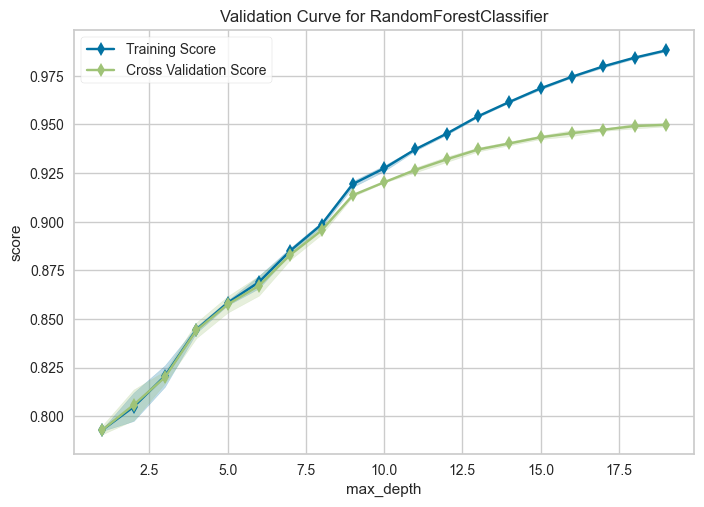

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>

In [21]:
from yellowbrick.model_selection import ValidationCurve
from sklearn.ensemble import RandomForestClassifier

viz = ValidationCurve(
    RandomForestClassifier(), param_name="max_depth",
    param_range=np.arange(1, 20), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

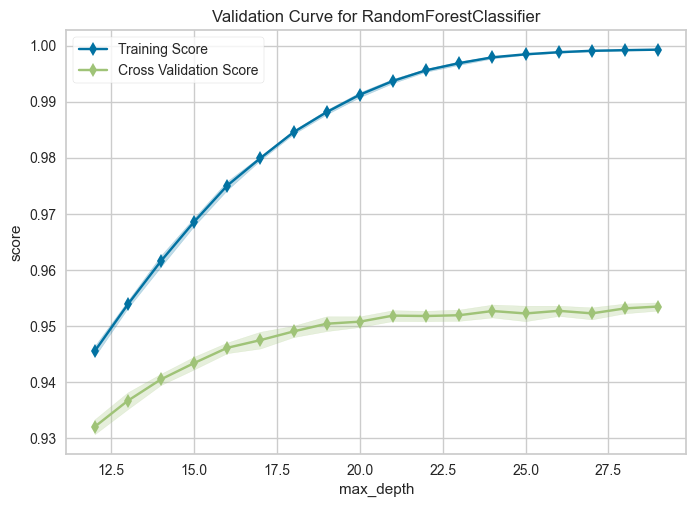

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>

In [22]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="max_depth",
    param_range=np.arange(12, 30), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

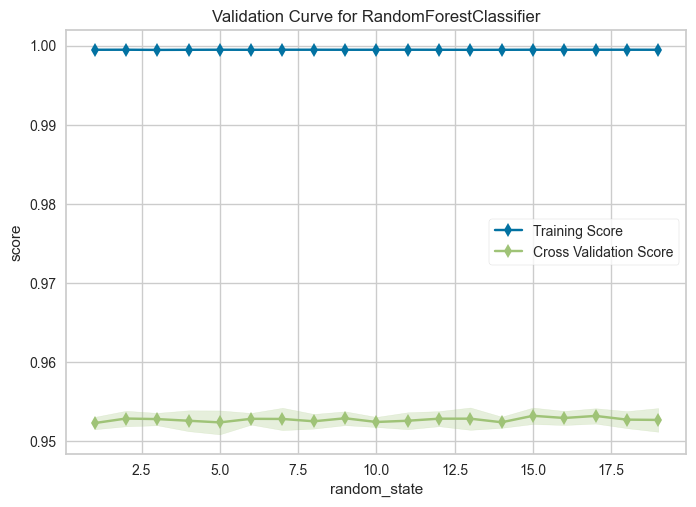

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='random_state', ylabel='score'>

In [23]:
from yellowbrick.model_selection import ValidationCurve

viz = ValidationCurve(
    RandomForestClassifier(), param_name="random_state",
    param_range=np.arange(1, 20), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

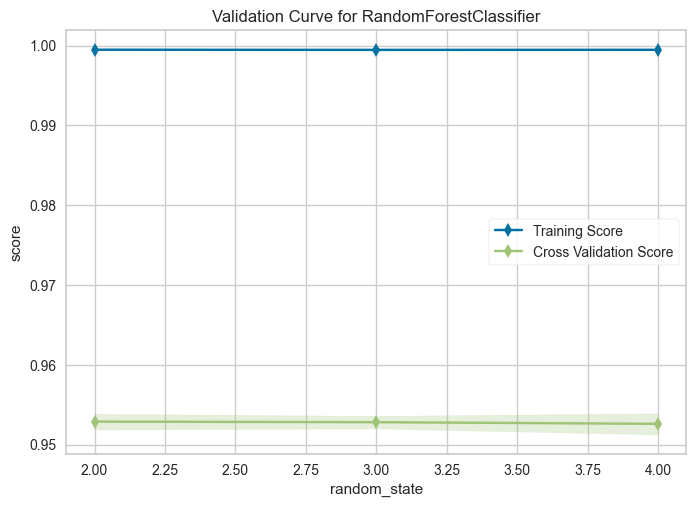

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='random_state', ylabel='score'>

In [24]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="random_state",
    param_range=np.arange(2, 5), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

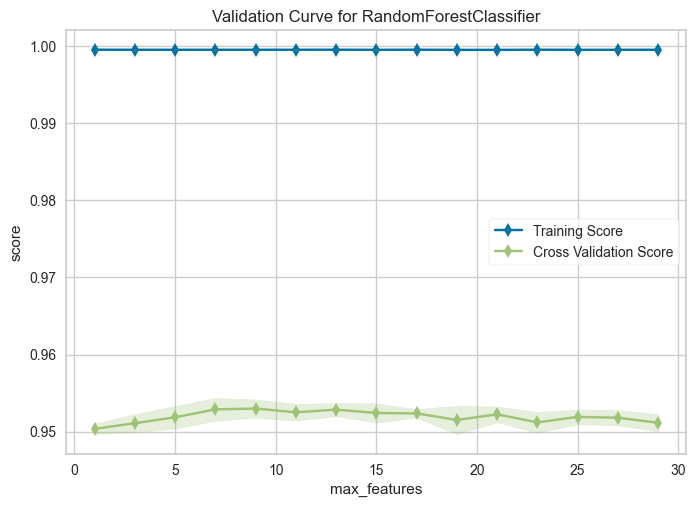

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_features', ylabel='score'>

In [25]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="max_features",
    param_range=np.arange(1, 30, 2), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

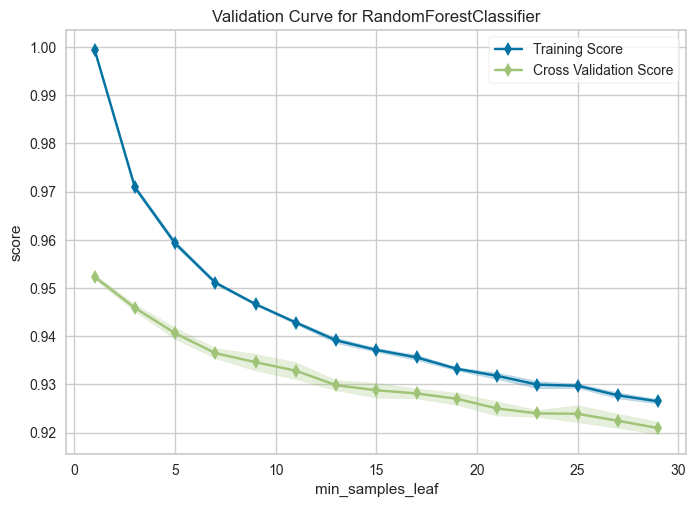

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_leaf', ylabel='score'>

In [26]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="min_samples_leaf",
    param_range=np.arange(1, 30, 2), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

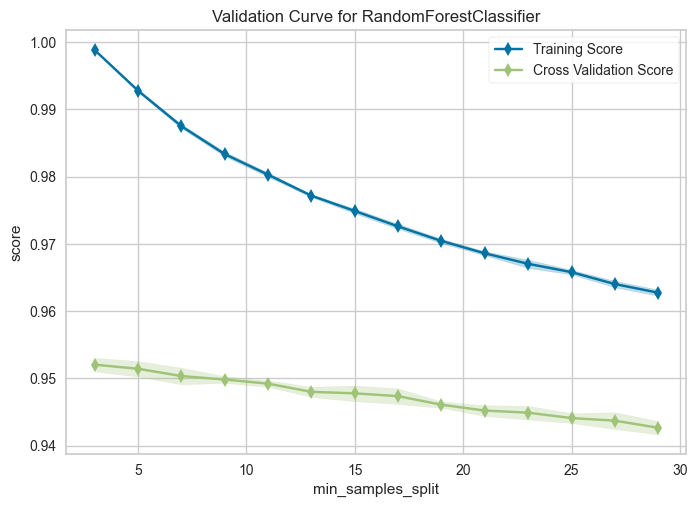

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_split', ylabel='score'>

In [27]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="min_samples_split",
    param_range=np.arange(1, 30, 2), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

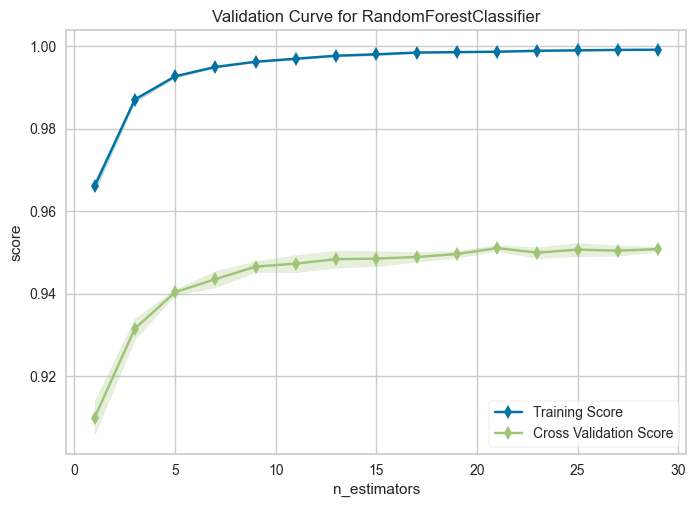

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>

In [28]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="n_estimators",
    param_range=np.arange(1, 30, 2), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()


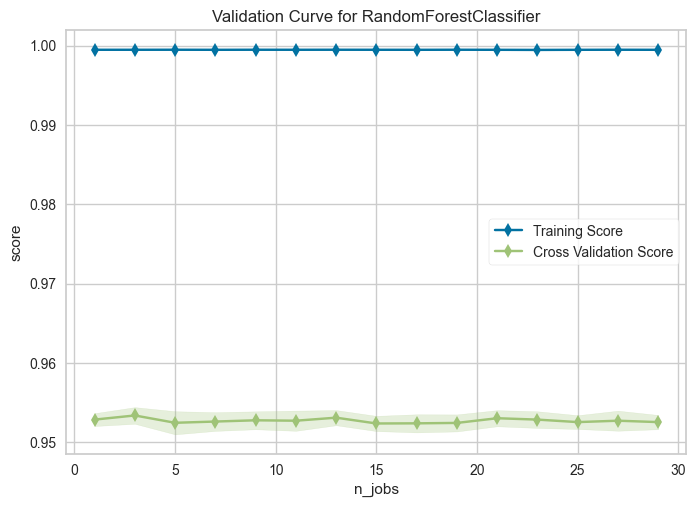

<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_jobs', ylabel='score'>

In [29]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="n_jobs",
    param_range=np.arange(1, 30, 2), cv=5, scoring="accuracy"
)

viz.fit(X, y)
viz.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(max_depth=25, random_state=5, max_features=8, n_jobs=8, n_estimators=25)
rfc.fit(X_train, y_train)
y_predicted = rfc.predict(X_test)
accuracy_score(y_test, y_predicted)

0.9512237609964289

# Feature Importances

C:\Users\Karan Singh\Phishing_Domain_Detector\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


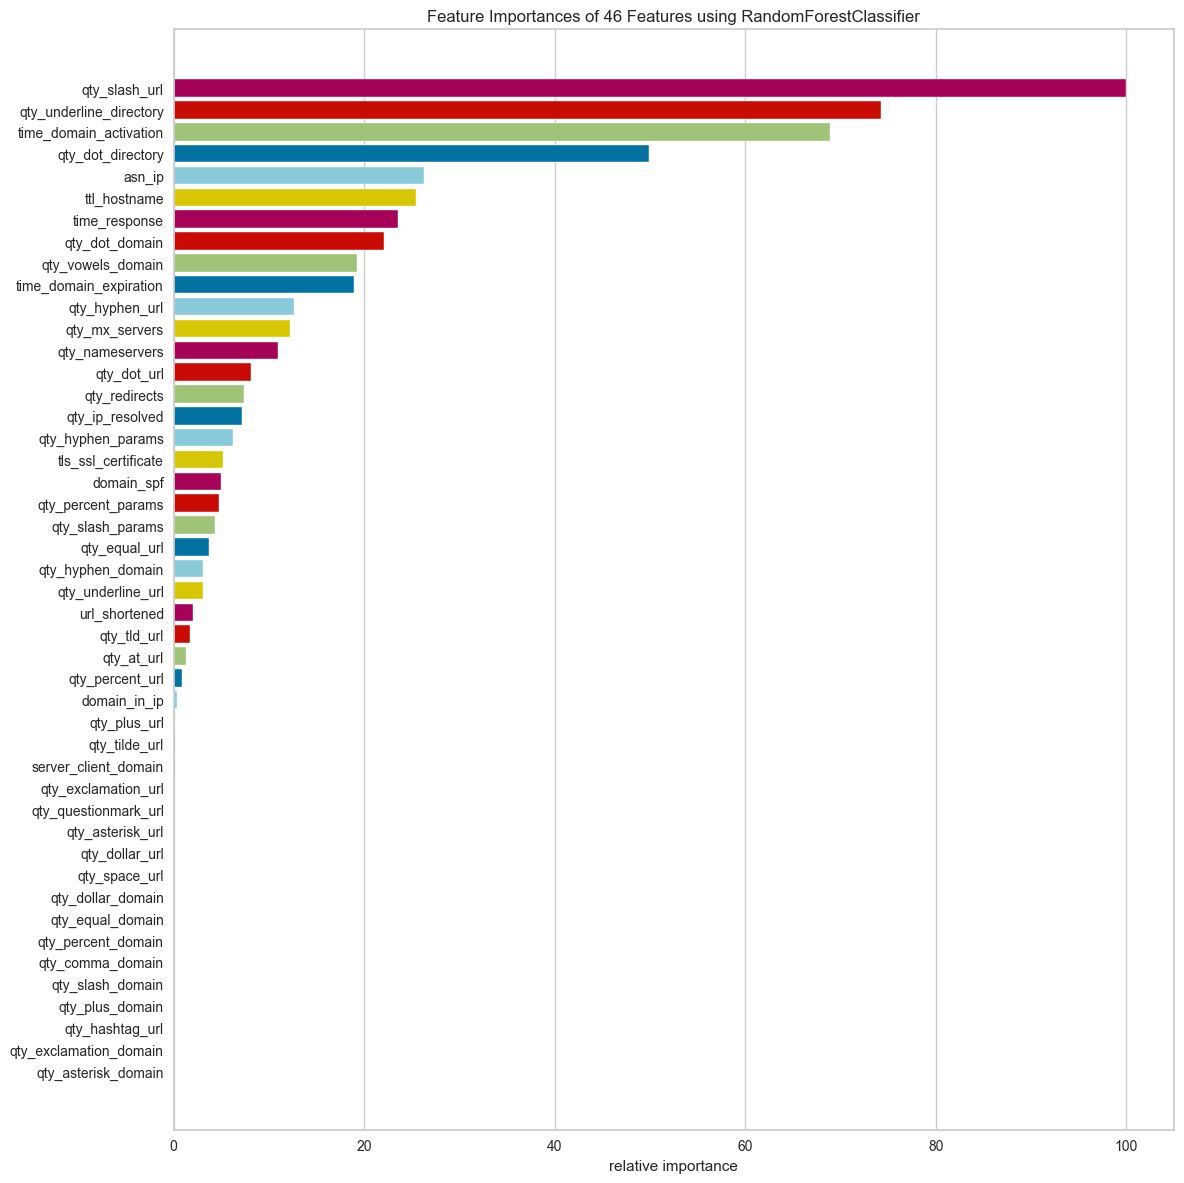

<Axes: title={'center': 'Feature Importances of 46 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [31]:
from yellowbrick.model_selection import FeatureImportances

plt.figure(figsize=(12,12))
viz = FeatureImportances(rfc)
viz.fit(X, y)
viz.show()

C:\Users\Karan Singh\Phishing_Domain_Detector\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


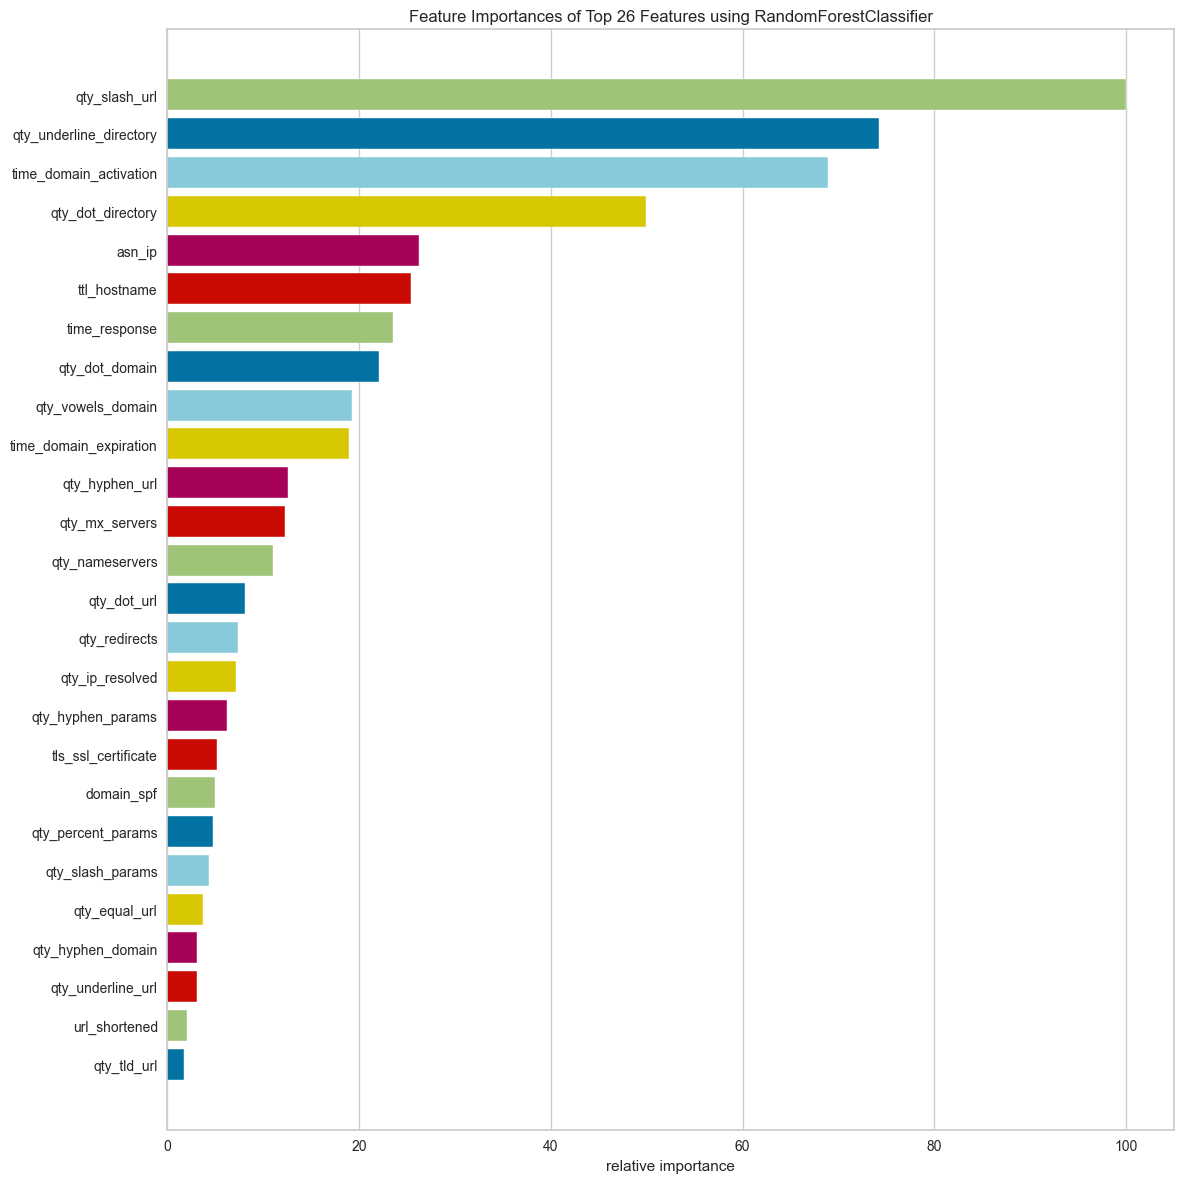

<Axes: title={'center': 'Feature Importances of Top 26 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [32]:
plt.figure(figsize=(12,12))
viz = FeatureImportances(rfc, topn=26)
viz.fit(X, y)
viz.show()

In [33]:
len(viz.features_)

26

In [34]:
X_train = X_train[viz.features_]
X_test = X_test[viz.features_]

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(max_depth=23, random_state=3)
rfc.fit(X_train, y_train)
y_predicted = rfc.predict(X_test)
accuracy_score(y_test, y_predicted)

0.9538367738001916

# Class Prediction Error

In [36]:
import warnings
warnings.simplefilter("ignore")

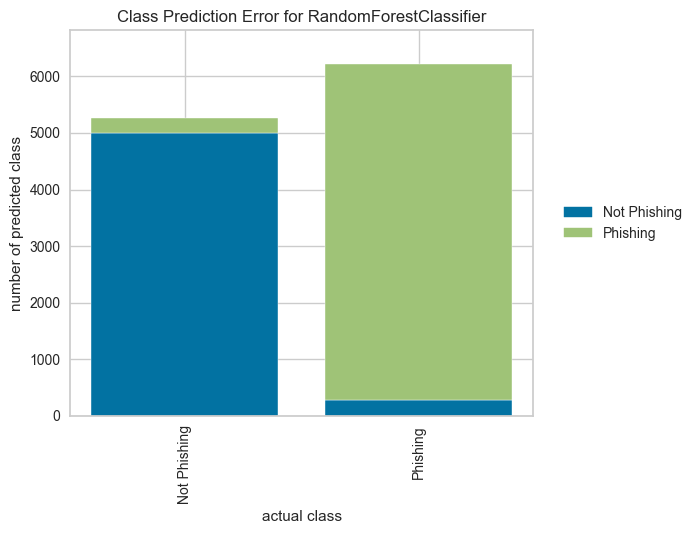

In [37]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(rfc, classes=['Not Phishing', 'Phishing'], label_encoder={0: 'Not Phishing', 1: 'Phishing'})
visualizer.score(X_test, y_test)
visualizer.show()
plt.show()

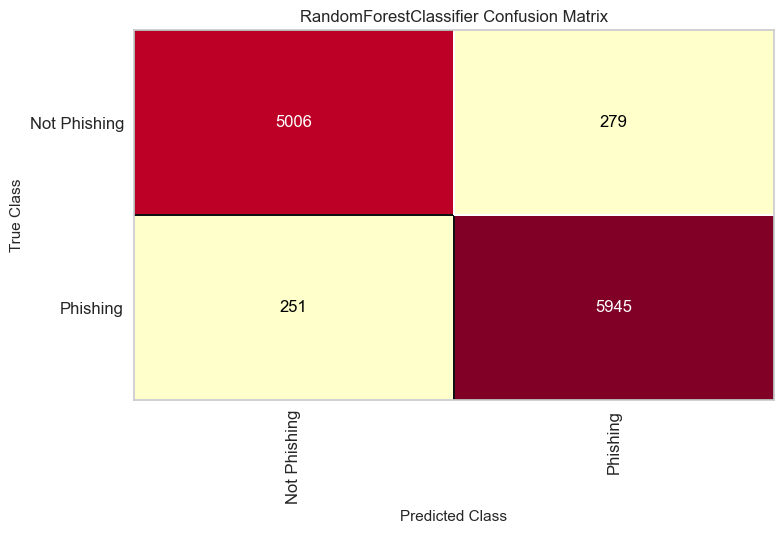

In [38]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(rfc, classes=['Not Phishing', 'Phishing'], label_encoder={0: 'Not Phishing', 1: 'Phishing'})
cm.score(X_test, y_test)
cm.show()
plt.show()

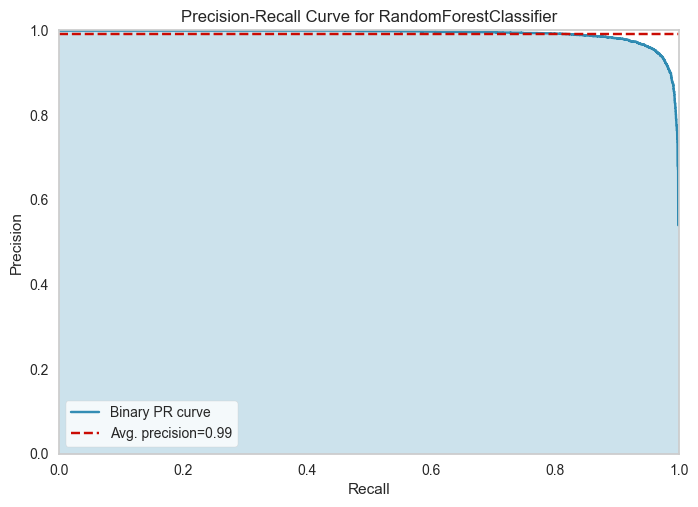

In [39]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(rfc)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()
plt.show()

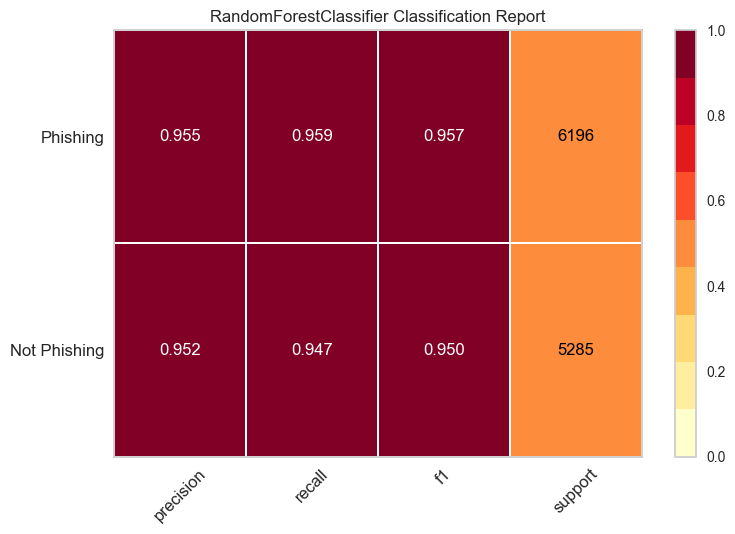

In [40]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(rfc, classes=['Not Phishing', 'Phishing'], label_encoder={0: 'Not Phishing', 1: 'Phishing'}, support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()
plt.show()

In [41]:
X_train.columns

Index(['qty_tld_url', 'url_shortened', 'qty_underline_url',
       'qty_hyphen_domain', 'qty_equal_url', 'qty_slash_params',
       'qty_percent_params', 'domain_spf', 'tls_ssl_certificate',
       'qty_hyphen_params', 'qty_ip_resolved', 'qty_redirects', 'qty_dot_url',
       'qty_nameservers', 'qty_mx_servers', 'qty_hyphen_url',
       'time_domain_expiration', 'qty_vowels_domain', 'qty_dot_domain',
       'time_response', 'ttl_hostname', 'asn_ip', 'qty_dot_directory',
       'time_domain_activation', 'qty_underline_directory', 'qty_slash_url'],
      dtype='object')

In [42]:
X_train.head()

,qty_tld_url,url_shortened,qty_underline_url,qty_hyphen_domain,qty_equal_url,qty_slash_params,qty_percent_params,domain_spf,tls_ssl_certificate,qty_hyphen_params,...,time_domain_expiration,qty_vowels_domain,qty_dot_domain,time_response,ttl_hostname,asn_ip,qty_dot_directory,time_domain_activation,qty_underline_directory,qty_slash_url
51949,1,0,0,0,0,-1,-1,0,0,-1,...,175,4,2,0.728938,3598,40676,0,554,0,1
56486,1,0,0,0,0,-1,-1,0,0,-1,...,193,8,1,0.962443,14389,24446,1,901,0,3
57299,2,0,0,0,0,-1,-1,1,0,-1,...,219,5,1,0.202584,14399,19551,3,875,0,5
41476,1,0,0,0,0,-1,-1,0,0,-1,...,-1,4,1,-1.000000,-1,-1,0,-1,0,2
10398,1,0,3,0,3,0,0,0,1,3,...,-1,7,2,2.700195,52,16509,0,-1,0,3


# Save Model

In [45]:
# save
import joblib
joblib.dump(rfc, "model.joblib")

['model.joblib']

In [44]:
ls

 Volume in drive C is OS
 Volume Serial Number is 6609-D90B

 Directory of C:\Users\Karan Singh\Phishing_Domain_Detector

03/17/2023  07:18 PM    <DIR>          .
03/17/2023  07:18 PM    <DIR>          ..
03/17/2023  07:11 PM    <DIR>          .idea
03/06/2023  07:39 PM        16,086,706 dataset_small.csv
03/17/2023  04:05 PM                 0 db.sqlite3
03/17/2023  04:02 PM               702 manage.py
03/17/2023  07:18 PM        41,787,590 model.pkl
03/17/2023  07:11 PM           528,826 Phishing Domain Detector.ipynb
03/17/2023  04:22 PM    <DIR>          Phishing_Domain_Detector
03/17/2023  05:51 PM    <DIR>          savedModels
03/17/2023  05:42 PM    <DIR>          templates
03/17/2023  05:14 PM    <DIR>          venv
03/17/2023  05:50 PM    <DIR>          website
               5 File(s)     58,403,824 bytes
               8 Dir(s)  124,819,542,016 bytes free
